# Lab Exam 

In [32]:
# Basim sherief zeenelabden 1210207
from commonfunctions import *
from BassemFunctions import *
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Import all modules from LabsMethods folder
from LabsMethods.Morph import *
from LabsMethods.ContrastEnhancement import *
from LabsMethods.EdgeDetection import *
from LabsMethods.Segmentation import *
from LabsMethods.Segmentation2 import *
from LabsMethods.Smoothing import *


from HelperForQuestion.ImproveImage import *
from HelperForQuestion.DetectSpecificShapes import *
from HelperForQuestion.HistogramQuestions import *
from HelperForQuestion.MaskQuestions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Question 1

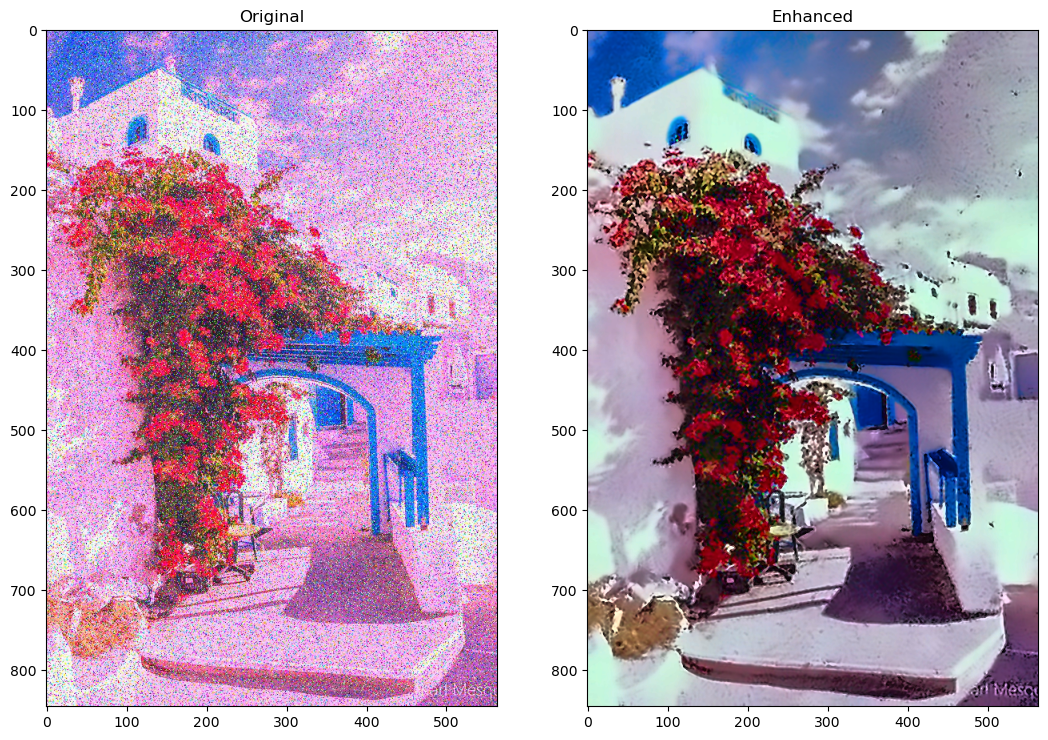

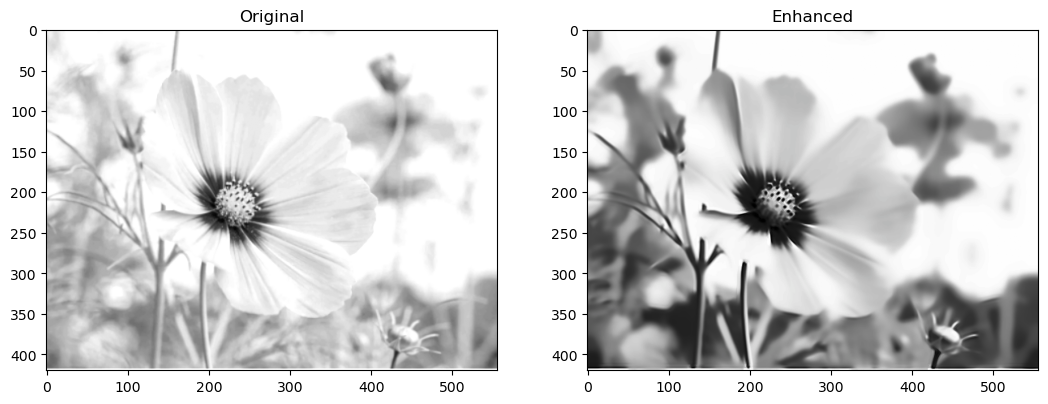

In [33]:

# Example usage with updated parameters
custom_params = {
    'median_kernel': 3,
    'gaussian_kernel': (3,3),
    'gaussian_sigma': 1,
    'clahe_clip': 3,
    'clahe_grid': (2,2),
    'nlmeans_h': 15,
    'nlmeans_template': 11,
    'nlmeans_search': 35,
    'sharpen_strength': 5,
    'white_balance_strength': 1
}

# Process image
img_rgb2 = preprocess_image('Q1-2.jpg', 'rgb')
enhanced_image2 = enhance_image(img_rgb2, custom_params)

# Show results
show_images([img_rgb2, enhanced_image2], 
           ['Original', 'Enhanced'])




# Example usage with updated parameters
custom_params1 = {
    'median_kernel': 3,
    'gaussian_kernel': (3,3),
    'gaussian_sigma': 1,
    'clahe_clip': 3,
    'clahe_grid': (2,2),
    'nlmeans_h': 15,
    'nlmeans_template': 11,
    'nlmeans_search': 35,
    'sharpen_strength': 5,
    'white_balance_strength': 1
}
img_rgb1 = preprocess_image('Q1-1.png', 'rgb')
# Process image
enhanced_image1 = enhance_image(img_rgb1, custom_params1)

# Show results
show_images([img_rgb1, enhanced_image1], 
           ['Original', 'Enhanced'])


### Question 2

Detected 9 points
Point 1: (135, 142)
Point 2: (87, 182)
Point 3: (181, 105)
Point 4: (99, 97)
Point 5: (176, 192)
Point 6: (50, 137)
Point 7: (144, 61)
Point 8: (127, 232)
Point 9: (221, 155)


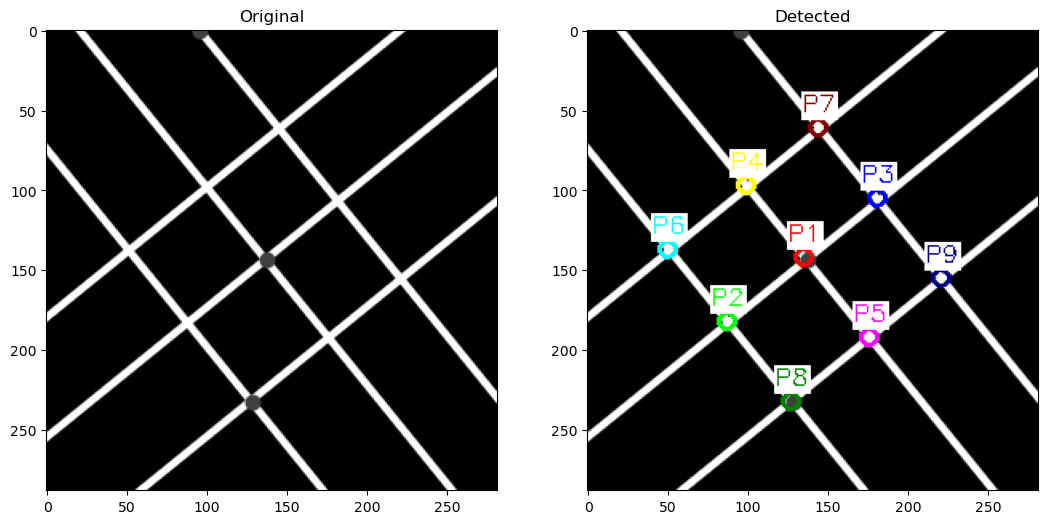

In [34]:
# Process image
img_gray = preprocess_image('Q2-Points.png', 'grayscale')

# Detect points

points = detect_points(img_gray)
print(f"Detected {len(points)} points")
marked_img, mapping = draw_detected_points(img_gray, points)

# Print point mapping
for point, info in mapping.items():
    print(f"{point}: {info['coordinates']}")

# Show results
show_images([img_gray, marked_img], 
           ['Original', 'Detected'])


In [35]:



def hough_transform_line(image, theta_res=1, rho_res=1):
    """
    Implement Hough Transform for lines.
    Returns parameter space and accumulator.
    """
    # Get image dimensions
    height, width = image.shape
    
    # Calculate maximum distance possible
    max_rho = int(np.sqrt(height**2 + width**2))
    
    # Create parameter space
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))
    rhos = np.arange(-max_rho, max_rho, rho_res)
    
    # Create accumulator
    accumulator = np.zeros((len(rhos), len(thetas)))
    
    # Find edge points
    y_idxs, x_idxs = np.nonzero(image)
    
    # Calculate Hough Transform
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        
        for theta_idx, theta in enumerate(thetas):
            rho = x*np.cos(theta) + y*np.sin(theta)
            rho_idx = np.argmin(np.abs(rhos - rho))
            accumulator[rho_idx, theta_idx] += 1
            
    return accumulator, rhos, thetas

def detect_lines_with_criteria(image, angle_range=(40,60), threshold=100):
    """
    Detect lines within specific angle range.
    """
    # Edge detection
    edges = cv2.Canny(image, 50, 150)
    
    # Get Hough Transform
    accumulator, rhos, thetas = hough_transform_line(edges)
    
    # Filter by angle range
    theta_min, theta_max = np.deg2rad(angle_range)
    theta_mask = (thetas >= theta_min) & (thetas <= theta_max)
    
    # Find peaks in accumulator
    lines = []
    for rho_idx, theta_idx in zip(*np.where(accumulator > threshold)):
        if theta_mask[theta_idx]:
            rho = rhos[rho_idx]
            theta = thetas[theta_idx]
            lines.append((rho, theta))
    
    return lines, accumulator

def draw_hough_space(accumulator, rhos, thetas, title="Hough Space"):
    """
    Visualize Hough parameter space.
    """
    plt.figure(figsize=(10, 8))

### Question 3

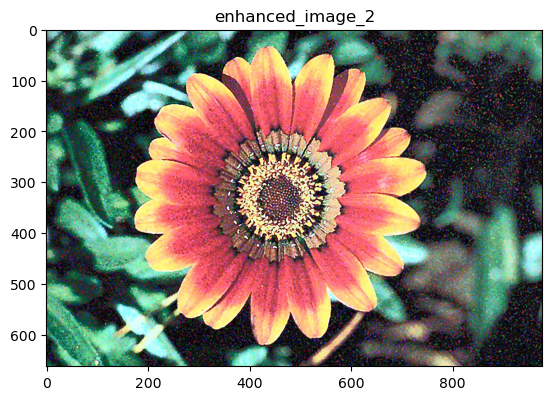

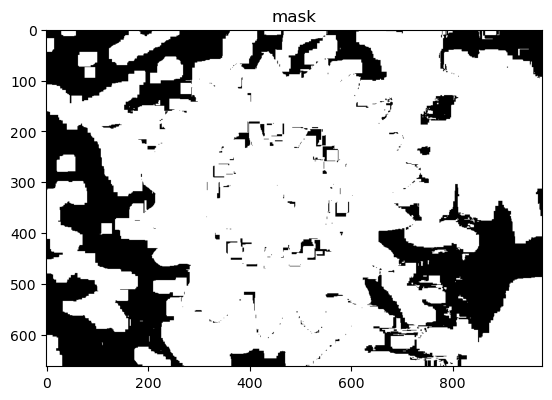

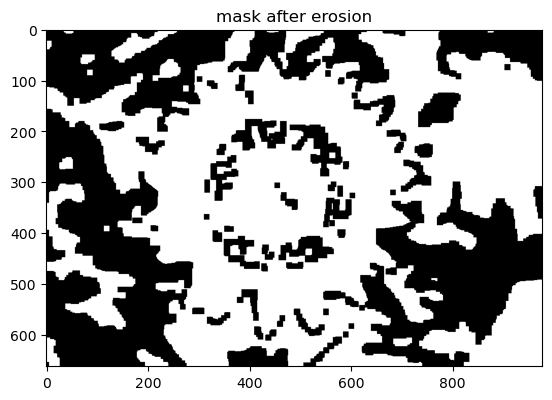

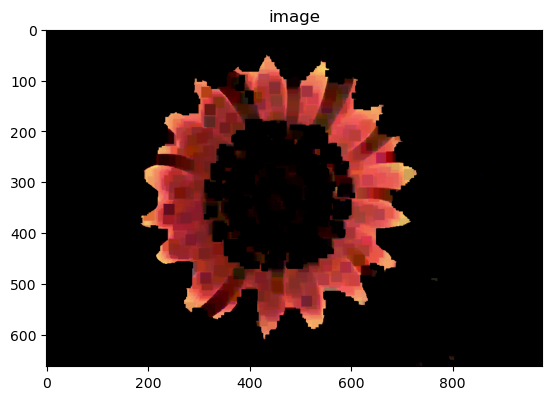

In [47]:
# 1- Get the required RGB color (Using a color picker)
# R_value = 69
# G_value = 91
# B_value = 29



# 2- Read image

# Read images
image = preprocess_image('Q3.jpg', 'rgb')

#remove noise and sharpen so that i can easily get a mask
# Example usage with updated parameters
custom_params11 = {
    'median_kernel': 3,
    'gaussian_kernel': (3,3),
    'gaussian_sigma': 0,
    'clahe_clip': 3,
    'clahe_grid': (2,2),
    'nlmeans_h': 5,
    'nlmeans_template': 5,
    'nlmeans_search': 5,
    'sharpen_strength': 5,
    'white_balance_strength': 1
}

# Process image
enhanced_image_2 = enhance_image(image, custom_params11)


show_images([enhanced_image_2],['enhanced_image_2'])
# enhanced_image_2 = enhanced_image_2.astype(float)

# 3- extract R, G and B channels (as float)
enhanced_image_2=enhanced_image_2.astype(np.uint8)
enhanced_image_2 = apply_erosion(enhanced_image_2, kernel_size=3, iterations=10)

R= enhanced_image_2[:,:,0]
G= enhanced_image_2[:,:,1]
B= enhanced_image_2[:,:,2]


enhanced_image_2[:,:,0] = R
enhanced_image_2[:,:,1] = G
enhanced_image_2[:,:,2] = B


mask = np.ones(G.shape)

mask[(G>R) ] = 0
mask[(G>R) ] = 0
mask[(R>G) & (B>G)] = 1
# then i will dilate and erode to obtain the minimal representation of a mask
show_images([mask],['mask'])
# dilated_mask3 = apply_dilation(mask, kernel_size=5, iterations=35)
final_mask3 = apply_erosion(mask, kernel_size=3, iterations=5)

show_images([final_mask3],['mask after erosion'])

# enhanced_image_2[final_mask3==0] = 0 


result3 = apply_mask(enhanced_image_2, final_mask3)

# 8- show the image or save it
show_images([result3],['image'])



### Question 4

98176


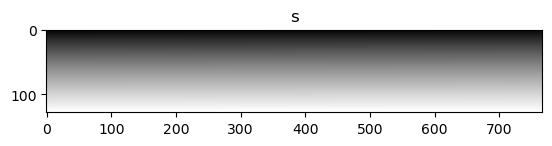

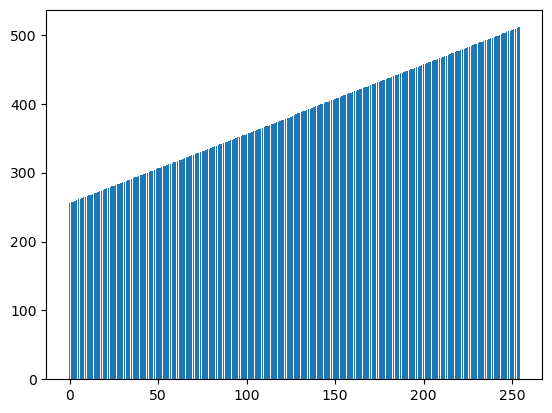

In [40]:
pixel_count = 0
for i in range(256, 512):
    pixel_count += i

row_c = 128
col_c = 767
print(pixel_count)

img = np.zeros((row_c, col_c))
val = 0
num = 0
idx = 0
# hist eqn:
# y = x + 256
for row in range(row_c):
    for col in range(col_c):
        img[row, col] = val
        num += 1
        if num >= 256 + idx:
            val += 1
            idx += 1
            num = 0

show_images([img], ["s"])
count = 0
showHist(img)